### Import libraries to perform data analysis, manipulation and visualizations 

## Company Sales strategy for the Winter season

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline




In [2]:
# reading the dataset 
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

## Dataset information

The dataset has the amount of 16719 rows and 16 columns in which 9 columns has been identified as dtype:float64 and 7 out of 16 has been identified as object.
It also can be seen that some columns has missing values. 
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#Identifying missing values 
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Missing values isnull() funcion 

It has been observed the following missing values in the features below: 
    
Name - 2

Year_of_Release - 269

Genre - 2

Publisher - 54

Critic_Score - 8582

Critic_Count - 8582

User_Score - 6704

User_Count - 9129

Developer - 6623

Rating - 6769


As the amount of missing values in the following colums: Name, Year_of_release, Genre and Publisher are small, I beliebe it would not have impact on my analysis, that is why I have decided to drop them. 

In [6]:
# Drop missing values in following columns: 
df2 = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
df2.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [7]:
# Assuming df2 is your DataFrame with NaN values dropped from certain columns
df_mode = df2.fillna({
    'User_Score': df2['User_Score'].mode()[0],  # Fill NaN in 'User_Score' with mode
    'Developer': df2['Developer'].mode()[0],    # Fill NaN in 'Developer' with mode
    'Rating': df2['Rating'].mode()[0]           # Fill NaN in 'Rating' with mode
})


<Axes: xlabel='Developer', ylabel='Count'>

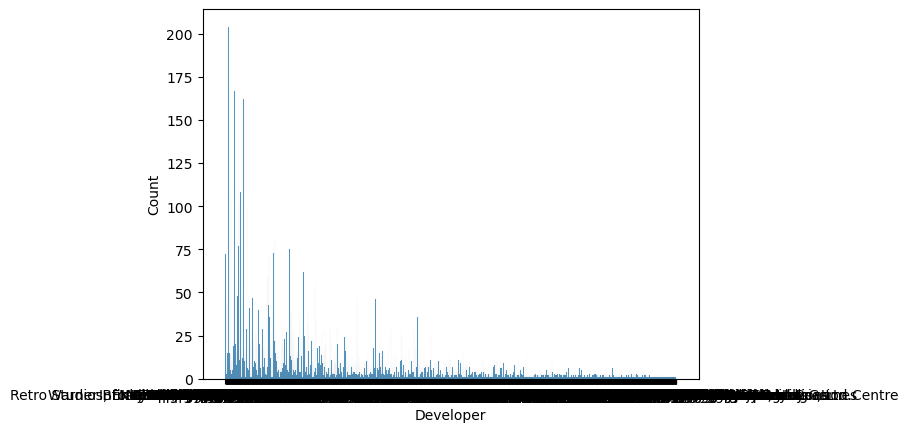

In [8]:
sns.histplot(df.Developer, kde=False)

<Axes: xlabel='Developer', ylabel='Count'>

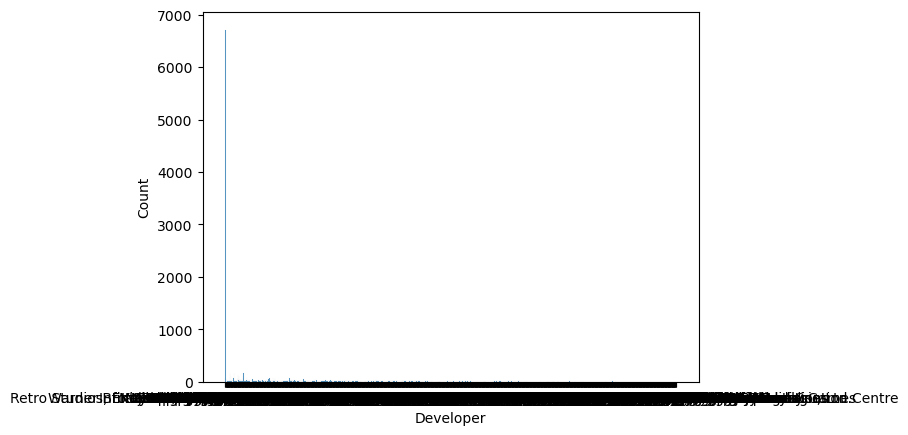

In [9]:
sns.histplot(df_mode.Developer, kde=False)

<Axes: xlabel='Rating', ylabel='Count'>

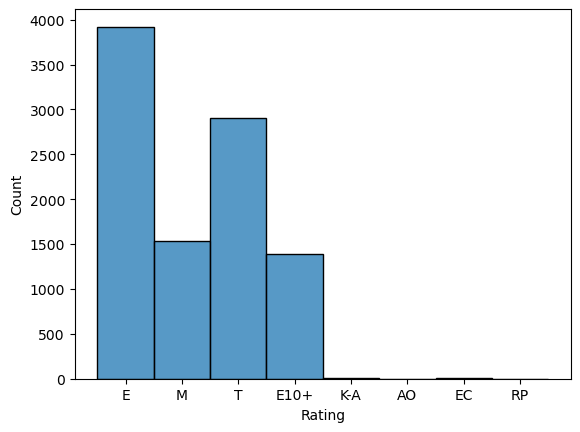

In [10]:
sns.histplot(df2.Rating, kde=False)

<Axes: xlabel='Rating', ylabel='Count'>

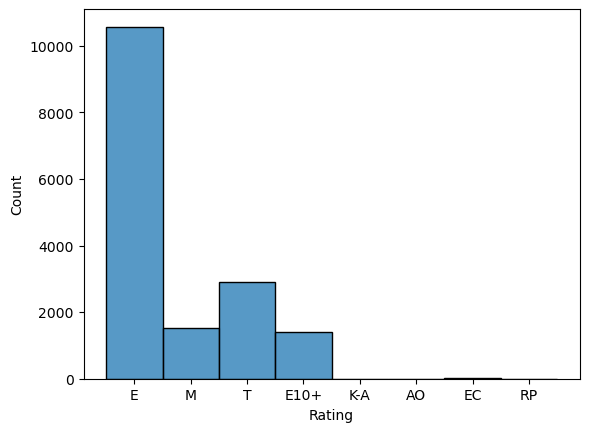

In [11]:
sns.histplot(df_mode.Rating, kde=False)

<Axes: xlabel='User_Score', ylabel='Count'>

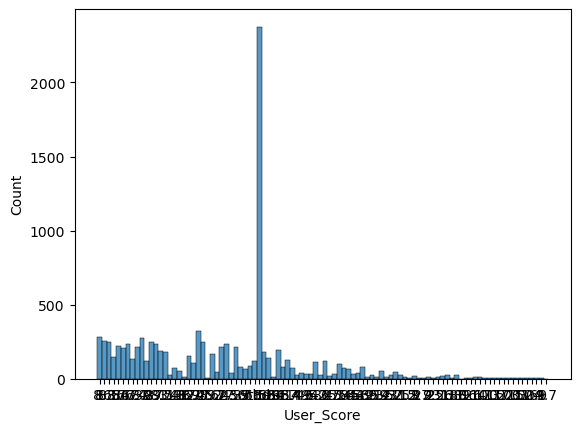

In [12]:
sns.histplot(df2.User_Score, kde=False)

<Axes: xlabel='User_Score', ylabel='Count'>

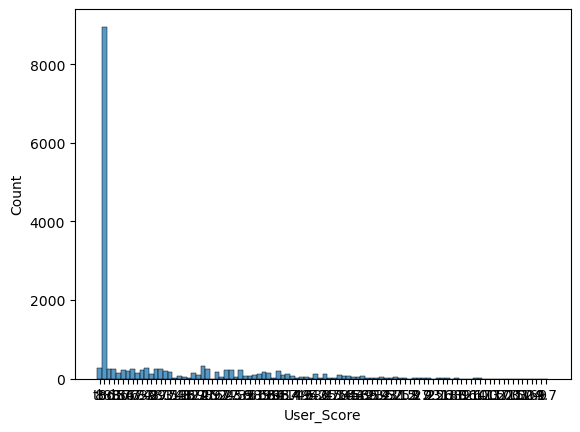

In [13]:
sns.histplot(df_mode.User_Score, kde=False)

<Axes: xlabel='Critic_Score', ylabel='Count'>

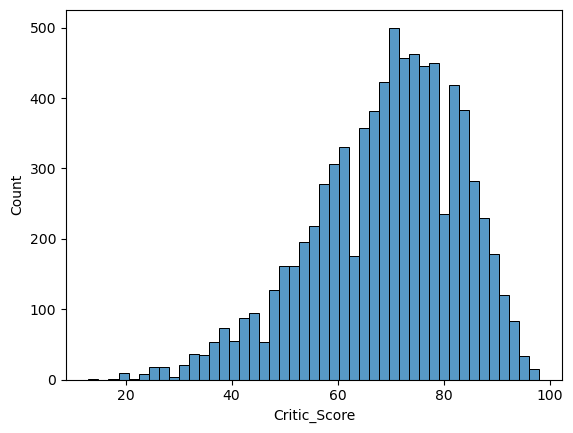

In [14]:
sns.histplot(df2.Critic_Score, kde=False)

In [15]:
df_mean = df2.fillna(df2['Critic_Score'].mean())
df_mean.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53     76.000000   
1     29.08      3.58      6.81         0.77         40.24     68.997119   
2     15.68     12.76      3.79         3.29         35.52     82.000000   
3     15.61     10.93      3.28         2.95         32.77     80.000000   
4     11.27      8.89     10.22         1.00         31.37     68.997119   

   Critic_Count User_Score  User_Count  Developer     Rating  
0     51.000000          8  322.000000   Nintendo          E  
1     68.997119  68.997119   68.997119  68.997119  68.997119  
2     73.000000        8.3  709.000000   Nintendo          E  
3     73.000000          8  192.000000   Nintendo          E  
4     68.997119  68.997119   68.997119  68.997119  68.997119

<Axes: xlabel='Critic_Score', ylabel='Count'>

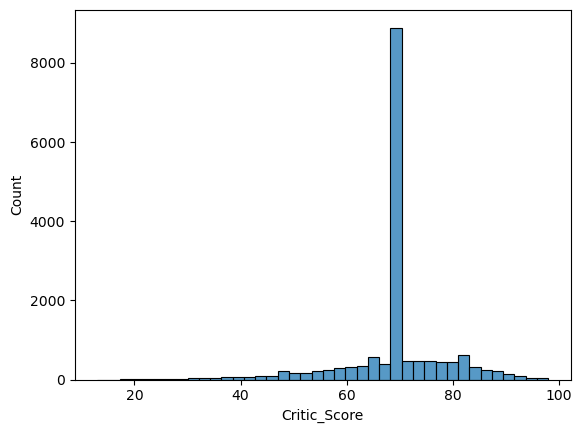

In [16]:
sns.histplot(df_mean.Critic_Score, kde=False, bins=40)

In [17]:
values = {'Critic_Score':0}
df_fill = df2.fillna(value=values)
df_fill.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           0.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           0.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

<Axes: xlabel='Critic_Score', ylabel='Count'>

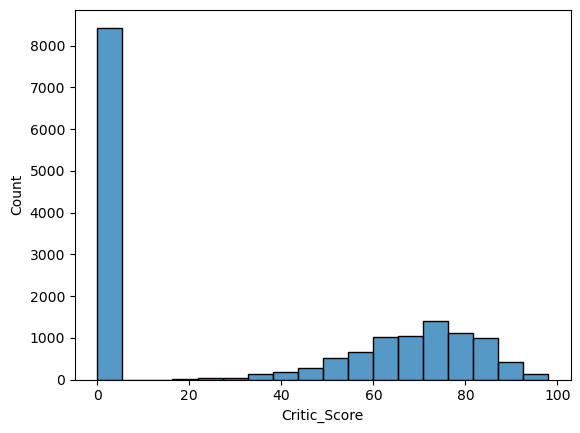

In [18]:
sns.histplot(df_fill.Critic_Score, kde=False)

<Axes: xlabel='Critic_Count', ylabel='Count'>

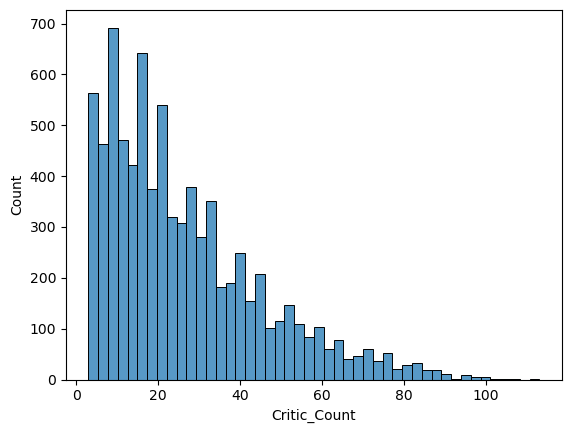

In [19]:
sns.histplot(df2.Critic_Count, kde=False)

<Axes: xlabel='User_Score', ylabel='Count'>

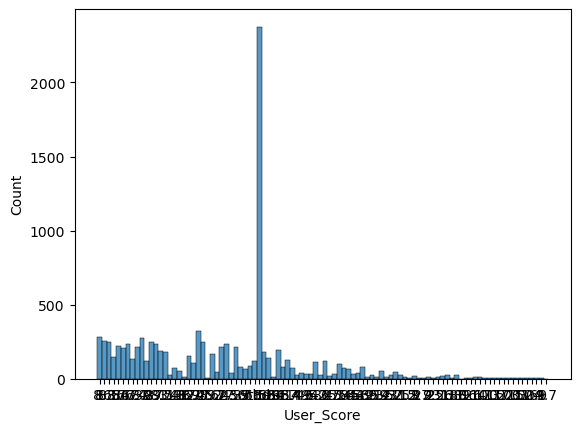

In [20]:
sns.histplot(df2.User_Score, kde=False)

<Axes: xlabel='User_Count', ylabel='Count'>

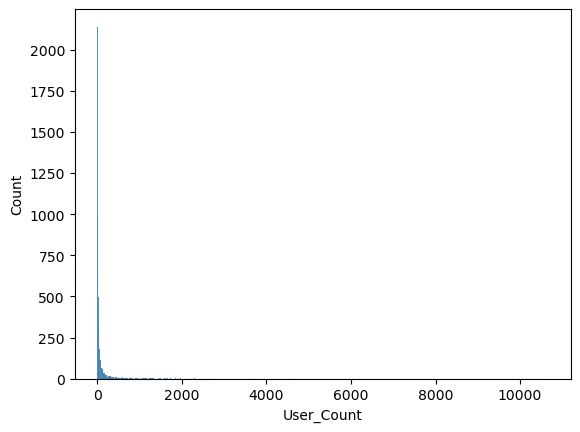

In [21]:
sns.histplot(df2.User_Count, kde=False)

### Imputation using Median 

In [22]:
df_median = df2.fillna(df2[['Critic_Score', 'Critic_Count', 'User_Count']].median())


In [23]:
df_median.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6579
User_Count            0
Developer          6512
Rating             6649
dtype: int64

In [24]:
df_median.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24          71.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37          71.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1          22.0        NaN        24.0       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4          22.0        NaN        24.0       NaN    NaN

<Axes: xlabel='Critic_Score', ylabel='Count'>

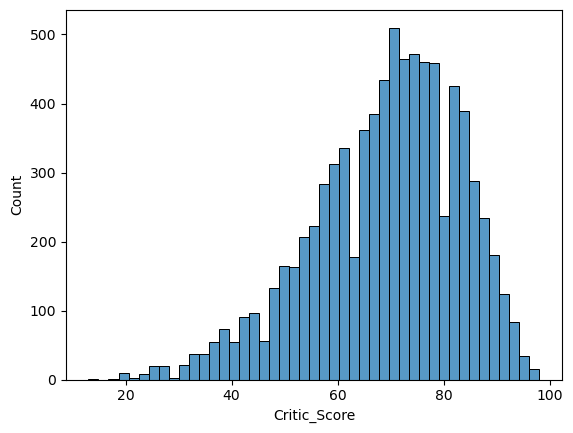

In [25]:
sns.histplot(df.Critic_Score, kde=False)

<Axes: xlabel='Critic_Score', ylabel='Count'>

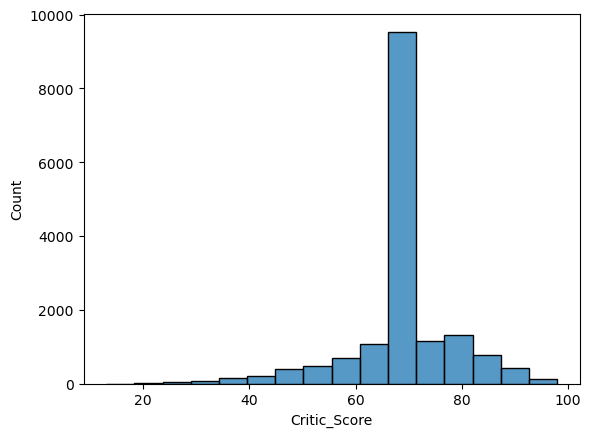

In [26]:
sns.histplot(df_median.Critic_Score, kde=False)

In [27]:
# Assuming df is your DataFrame
# Replace NaN values in different columns with 'unknown'
df2.fillna({'User_Score': 'unknown', 'Developer': 'unknown', 'Rating': 'unknown'}, inplace=True)
df2.isnull().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5456\816297373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna({'User_Score': 'unknown', 'Developer': 'unknown', 'Rating': 'unknown'}, inplace=True)


Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score            0
User_Count         8955
Developer             0
Rating                0
dtype: int64

In [28]:
def random_sample_imputation(dfz):
    
    cols_with_missing_values = dfz.columns[dfz.isna().any()].tolist()
    for var in cols_with_missing_values:
        
        # Get the number of NaN values
        num_missing = dfz[var].isnull().sum()
        
        # Check if there are more NaN values than non-NaN values
        if num_missing > dfz[var].notnull().sum():
            
            # If so, sample with replacement
            random_sample_df = dfz[var].dropna().sample(num_missing, replace=True, random_state=0)
        else:
            # Otherwise, sample without replacement
            random_sample_df = dfz[var].dropna().sample(num_missing, replace=False, random_state=0)
            
        # Re-index the randomly extracted sample
        random_sample_df.index = dfz[dfz[var].isnull()].index
        
        # Fill NaN values with the randomly sampled values
        dfz.loc[dfz[var].isnull(), var] = random_sample_df
        
    return dfz


In [29]:
dfz = df2.copy()
random_sample_imp_df = random_sample_imputation(df2)
random_sample_imp_df.head()


Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24          69.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37          80.0   

   Critic_Count User_Score  User_Count Developer   Rating  
0          51.0          8       322.0  Nintendo        E  
1          27.0    unknown        10.0   unknown  unknown  
2          73.0        8.3       709.0  Nintendo        E  
3          73.0          8       192.0  Nintendo        E  
4          44.0    unknown        20.0   unknown  unknown

In [30]:
!pip install miceforest

In [51]:
df_mean['Critic_Score_Imp'] = df_mean['Critic_Score']
df_median["Critic_Score_Imp"] = df_median["Critic_Score"]
random_sample_imp_df["Critic_Score_Imp"] = random_sample_imp_df["Critic_Score"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5456\1176248823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_sample_imp_df["Critic_Score_Imp"] = random_sample_imp_df["Critic_Score"]


<Axes: ylabel='Density'>

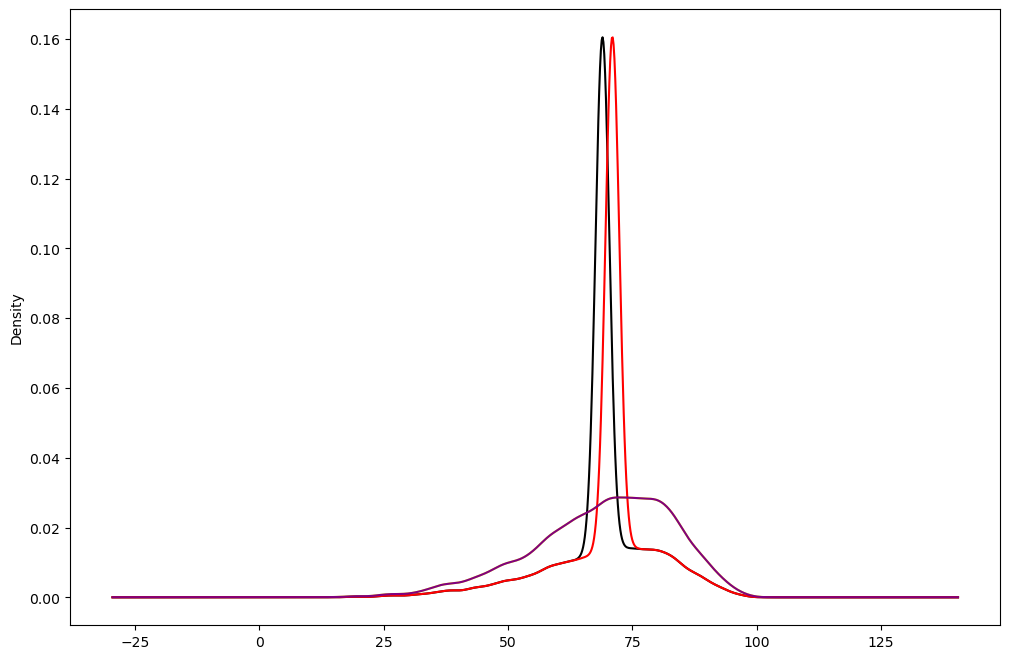

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

df2["Critic_Score"].plot(kind='kde',color='yellow')
df_mean['Critic_Score_Imp'].plot(kind='kde', color='black')
df_median["Critic_Score_Imp"].plot(kind='kde',color='red')
random_sample_imp_df["Critic_Score_Imp"].plot(kind='kde',color='purple')

In [53]:
random_sample_imp_df.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher           0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
Developer           0
Rating              0
Critic_Score_Imp    0
dtype: int64

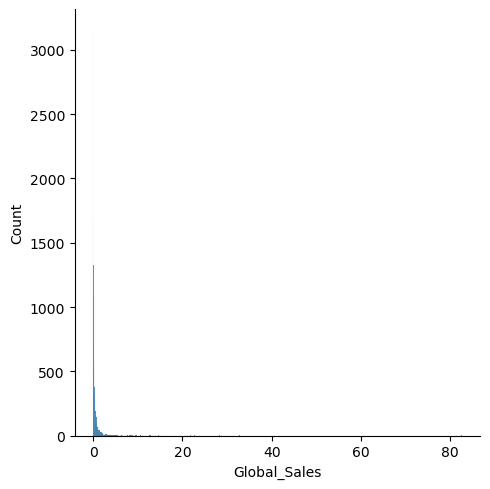

In [54]:

sns.displot(random_sample_imp_df, x="Global_Sales")

<Axes: xlabel='Global_Sales', ylabel='Count'>

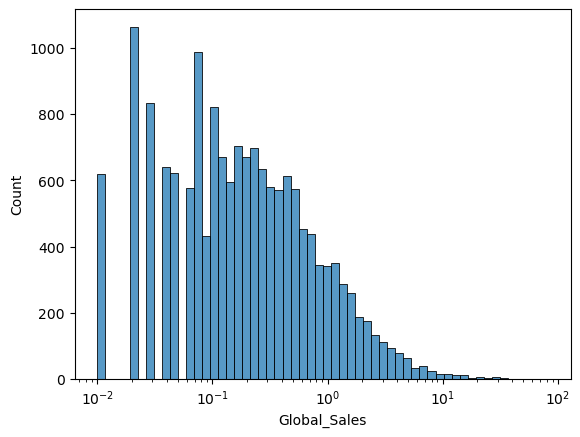

In [59]:
sns.histplot(data=random_sample_imp_df, x="Global_Sales", log_scale=True)

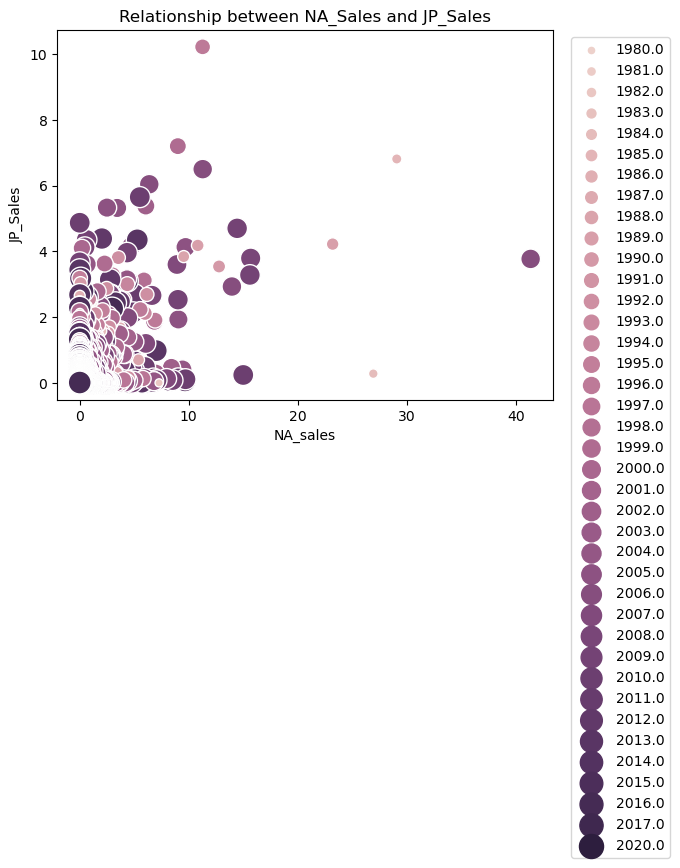

In [55]:
sns.scatterplot(x='NA_Sales', y='JP_Sales', hue='Year_of_Release', data=random_sample_imp_df, size='Year_of_Release', sizes=(20, 300), legend="full")


# add labels and title

plt.xlabel("NA_sales")

plt.ylabel("JP_Sales")

plt.title("Relationship between NA_Sales and JP_Sales")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1));

# display the plot

plt.show()

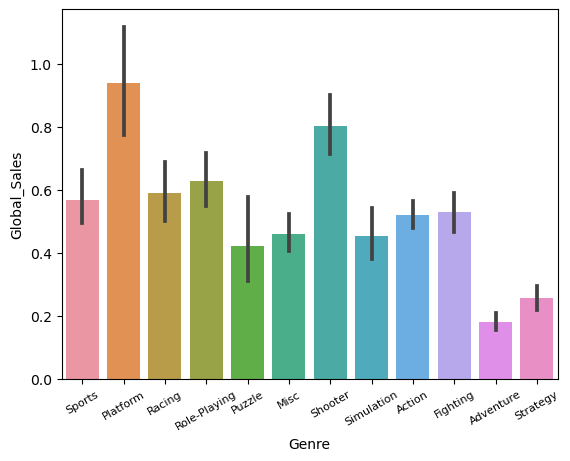

In [39]:
ax = sns.barplot(data=df2, x='Genre', y='Global_Sales')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=30);

<Axes: xlabel='Global_Sales', ylabel='Genre'>

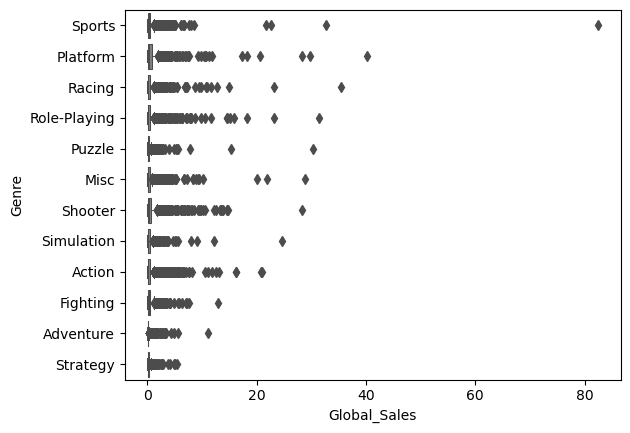

In [69]:
sns.boxplot(data=random_sample_imp_df, x="Global_Sales", y="Genre", color=".5", linewidth=.75)

## C) What is the distribution of the most popular 4 game genres?

<Axes: xlabel='count', ylabel='Genre'>

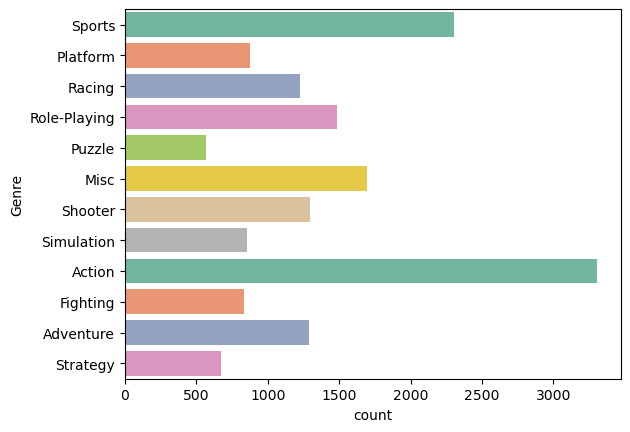

In [42]:
sns.countplot(df2, y="Genre", palette='Set2')


In [43]:
cut_count_table=pd.crosstab(index=df2['Genre'], columns='count')

In [44]:
cut_count_table

col_0         count
Genre              
Action         3307
Adventure      1291
Fighting        837
Misc           1697
Platform        878
Puzzle          569
Racing         1225
Role-Playing   1483
Shooter        1296
Simulation      855
Sports         2306
Strategy        672

<Axes: xlabel='Genre'>

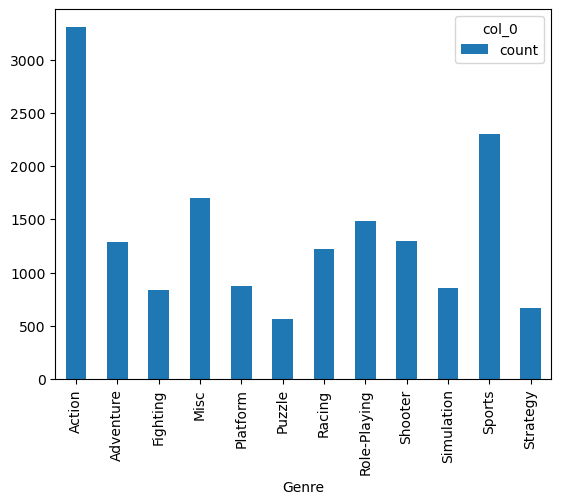

In [45]:
cut_count_table.plot(kind='bar')

### Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

A one-tailed statistical hypothesis has been used as we would like to know if the mean of EU_Sales of older games from 2005 and earlier is greater than newer games released after 2005 onwards. 

Considering this: 
Null hypothesis -  H0: Older Games µ ≥ New Games

Alternative hypothesis - Ha: New Games µ < Older Games 



In [96]:
from scipy.stats import ttest_ind

older_games = random_sample_imp_df[random_sample_imp_df['Year_of_Release'] <= 2005]['EU_Sales'].dropna()
newer_games = random_sample_imp_df[random_sample_imp_df['Year_of_Release'] > 2005]['EU_Sales'].dropna()

# Compare samples
stat, p = ttest_ind(older_games, newer_games)

print("p-values:",p)
print("t-test:",stat)

# 0.05 or 5% is significance level or alpha.
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


p-values: 0.6789044778836104
t-test: 0.4139659154689847
Hypothesis Accepted


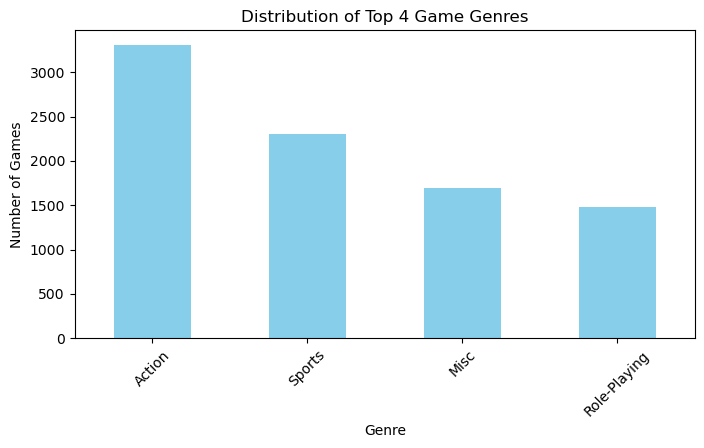

In [99]:
# Count occurrences of each genre
genre_counts = random_sample_imp_df['Genre'].value_counts()

# Sort genre counts in descending order
sorted_genre_counts = genre_counts.sort_values(ascending=False)

# Select the top 4 genres
top_4_genres = sorted_genre_counts.head(4)

# Plot the distribution of the top 4 genres
top_4_genres.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()
